In [1]:
import pandahouse as ph
import pandas as pd

In [2]:
connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'password': 'dpo_python_2020',
    'user': 'student',
    'database': 'simulator_20250520'
}

In [3]:
q = """
SELECT toDate(time) AS date, uniqExact(post_id) as posts, uniqExact(user_id) AS dau,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
FROM {db}.feed_actions 
GROUP BY date
"""
df = ph.read_clickhouse(q, connection=connection)
df.set_index('date', inplace = True, drop = False)

In [4]:
df.head()

,date,posts,dau,likes,views,ctr
date,,,,,,
2025-04-05,2025-04-05,89,878,1560,7603,0.205182
2025-04-06,2025-04-06,178,2238,12816,62770,0.204174
2025-04-07,2025-04-07,191,3105,20958,105526,0.198605
2025-04-08,2025-04-08,211,3721,23800,118996,0.200007
2025-04-09,2025-04-09,214,4617,34504,174454,0.197783


In [5]:
pre_period = [pd.Timestamp('2025-04-05'), pd.Timestamp('2025-05-15')]
post_period = [pd.Timestamp('2025-05-16'), pd.Timestamp('2025-05-22')]

In [6]:
from causalimpact import CausalImpact

impact_dau = CausalImpact(data=pd.Series(df['dau']),
                      pre_period=pre_period, 
                      post_period=post_period)

2025-06-15 12:53:24.389533: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-15 12:53:24.435884: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-15 12:53:24.436475: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-15 12:53:25.094391: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))


2025-06-15 12:53:26.601876: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'shape' with dtype int32 and shape [1]
	 [[{{node shape}}]]
2025-06-15 12:53:26.602001: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'shape' with dtype int32 and shape [1]
	 [[{{node shape}}]]
2025-06-15 12:53:26.609610: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'shape' with dtype int32 and shape [1]
	 [[{{node shape}}]]
2025-06-15 12:53:26.609693: I tens

Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`


2025-06-15 12:53:26.815826: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2025-06-15 12:53:27.224924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2025-06-15 12:53:27.241814: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_1_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/Pa

Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.


2025-06-15 12:53:35.808349: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/while/strided_slice/AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/concat_1' with dtype int32 and shape [2]
	 [[{{node AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/while/strided_slice/AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/concat_1}}]]
2025-06-15 12:53:35.858586: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/whil

In [7]:
print(impact_dau.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    16052.71           112369.0
Prediction (s.d.)         15048.33 (1024.71) 105338.29 (7172.97)
95% CI                    [12977.47, 16994.26][90842.31, 118959.83]

Absolute effect (s.d.)    1004.39 (1024.71)  7030.71 (7172.97)
95% CI                    [-941.55, 3075.24] [-6590.83, 21526.69]

Relative effect (s.d.)    6.67% (6.81%)      6.67% (6.81%)
95% CI                    [-6.26%, 20.44%]   [-6.26%, 20.44%]

Posterior tail-area probability p: 0.15
Posterior prob. of a causal effect: 84.72%

For more details run the command: print(impact.summary('report'))


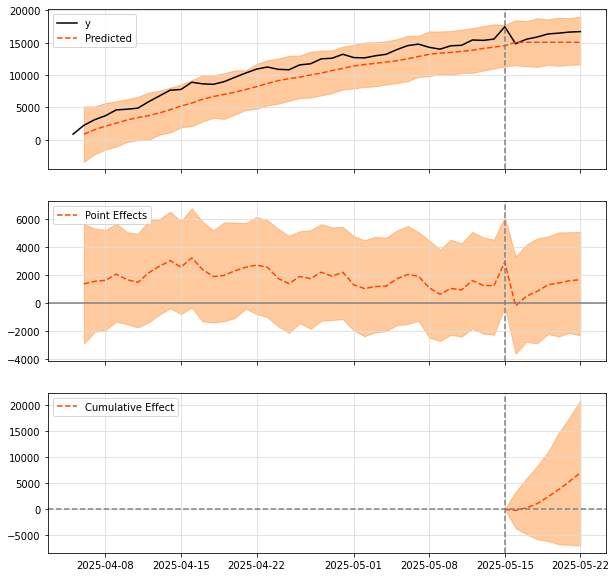

In [8]:
impact_dau.plot(figsize=(10,10))

In [9]:
print(impact_dau.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 16052.71. In the absence of an
intervention, we would have expected an average response of 15048.33.
The 95% interval of this counterfactual prediction is [12977.47, 16994.26].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 1004.39 with a 95% interval of
[-941.55, 3075.24]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 112369.0.
Had the intervention not taken place, we would have expected
a sum of 105338.29. The 95% interval of this prediction is [90842.31, 118959.83].


The above results are given in terms of absolute numbers. In relative
terms, the response vari

In [10]:
impact_ctr = CausalImpact(data=pd.Series(df['ctr']),
                      pre_period=pre_period, 
                      post_period=post_period)

2025-06-15 12:53:37.794481: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2025-06-15 12:53:37.809826: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2025-06-15 12:53:38.153347: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2025-06-15 12:

In [11]:
print(impact_ctr.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    0.21               1.5
Prediction (s.d.)         0.21 (0.0)         1.45 (0.02)
95% CI                    [0.2, 0.21]        [1.42, 1.48]

Absolute effect (s.d.)    0.01 (0.0)         0.05 (0.02)
95% CI                    [0.0, 0.01]        [0.02, 0.08]

Relative effect (s.d.)    3.31% (1.12%)      3.31% (1.12%)
95% CI                    [1.09%, 5.48%]     [1.09%, 5.48%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 99.9%

For more details run the command: print(impact.summary('report'))


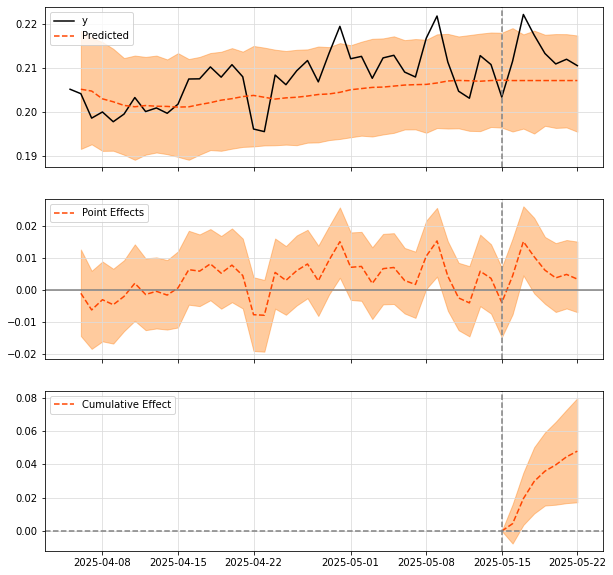

In [12]:
impact_ctr.plot(figsize=(10,10))

In [13]:
print(impact_ctr.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 0.21. By contrast, in the absence of an
intervention, we would have expected an average response of 0.21.
The 95% interval of this counterfactual prediction is [0.2, 0.21].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 0.01 with a 95% interval of
[0.0, 0.01]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 1.5.
By contrast, had the intervention not taken place, we would have expected
a sum of 1.45. The 95% interval of this prediction is [1.42, 1.48].


The above results are given in terms of absolute numbers. In relative
terms, the response variable showed an incre

In [14]:
impact_views = CausalImpact(data=pd.Series(df['views']),
                      pre_period=pre_period, 
                      post_period=post_period)

2025-06-15 12:53:48.015209: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2025-06-15 12:53:48.030181: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2025-06-15 12:53:48.370496: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2025-06-15 12:

2025-06-15 12:53:56.740892: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/while/strided_slice/AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/concat_1' with dtype int32 and shape [2]
	 [[{{node AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/while/strided_slice/AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/concat_1}}]]
2025-06-15 12:53:56.789914: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/whil

In [15]:
print(impact_views.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    1019947.31         7139631.0
Prediction (s.d.)         365564.66 (47204.92)2558952.5 (330434.43)
95% CI                    [274704.89, 459744.83][1922934.27, 3218213.69]

Absolute effect (s.d.)    654382.62 (47204.92)4580678.5 (330434.43)
95% CI                    [560202.49, 745242.42][3921417.31, 5216696.72]

Relative effect (s.d.)    179.01% (12.91%)   179.01% (12.91%)
95% CI                    [153.24%, 203.86%] [153.24%, 203.86%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [16]:
print(impact_views.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 1019947.31. By contrast, in the absence of an
intervention, we would have expected an average response of 365564.66.
The 95% interval of this counterfactual prediction is [274704.89, 459744.83].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 654382.62 with a 95% interval of
[560202.49, 745242.42]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 7139631.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 2558952.5. The 95% interval of this prediction is [1922934.27, 3218213.69].


The above results are given in terms of absolute numb

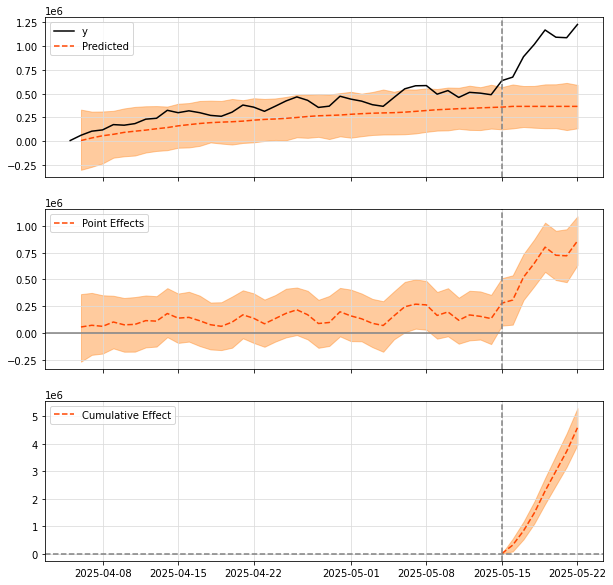

In [17]:
impact_views.plot(figsize=(10,10))

In [18]:
df['posts'].head()

date
2025-04-05     89
2025-04-06    178
2025-04-07    191
2025-04-08    211
2025-04-09    214
Name: posts, dtype: uint64

In [19]:
impact_posts = CausalImpact(data=pd.Series(df['posts']),
                      pre_period=pre_period, 
                      post_period=post_period)

2025-06-15 12:53:58.322408: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2025-06-15 12:53:58.337378: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2025-06-15 12:53:58.674744: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2025-06-15 12:

In [20]:
print(impact_posts.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    277.14             1940.0
Prediction (s.d.)         197.32 (8.69)      1381.26 (60.86)
95% CI                    [179.28, 213.35]   [1254.93, 1493.47]

Absolute effect (s.d.)    79.82 (8.69)       558.74 (60.86)
95% CI                    [63.79, 97.87]     [446.53, 685.07]

Relative effect (s.d.)    40.45% (4.41%)     40.45% (4.41%)
95% CI                    [32.33%, 49.6%]    [32.33%, 49.6%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [21]:
print(impact_posts.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 277.14. By contrast, in the absence of an
intervention, we would have expected an average response of 197.32.
The 95% interval of this counterfactual prediction is [179.28, 213.35].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 79.82 with a 95% interval of
[63.79, 97.87]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 1940.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 1381.26. The 95% interval of this prediction is [1254.93, 1493.47].


The above results are given in terms of absolute numbers. In relative
terms, the response

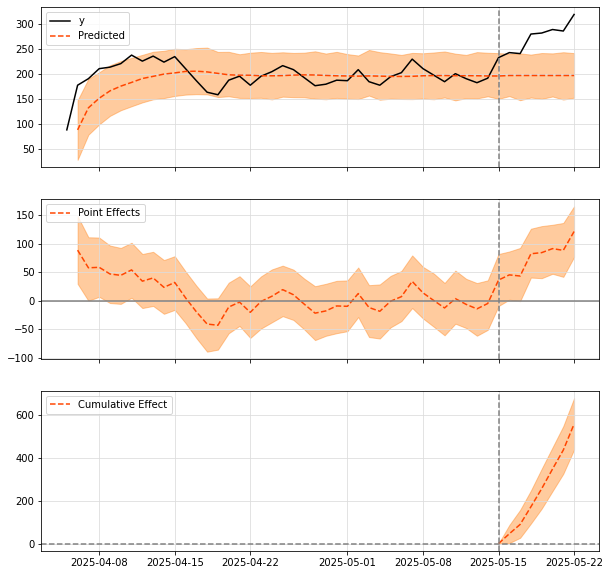

In [22]:
impact_posts.plot(figsize=(10,10))

In [23]:
query_2 = '''
select     date,
    count(post_id) as new_posts
from (
select DISTINCT post_id,
        min(toDate(time)) as date
from {db}.feed_actions
group by post_id )
group by date
order by date
'''

In [24]:
df_2 = ph.read_clickhouse(query_2, connection=connection)
df_2.head()

,date,new_posts
0,2025-04-05,89
1,2025-04-06,97
2,2025-04-07,61
3,2025-04-08,87
4,2025-04-09,70


In [25]:
df_2.set_index('date',inplace=True)

In [26]:
impact_new_posts = CausalImpact(data=df_2.new_posts,
                      pre_period=pre_period,
                      post_period=post_period)

2025-06-15 12:54:09.442175: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2025-06-15 12:54:09.456831: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2025-06-15 12:54:09.781686: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2025-06-15 12:

2025-06-15 12:54:18.061858: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/while/strided_slice/AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/concat_1' with dtype int32 and shape [2]
	 [[{{node AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/while/strided_slice/AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/concat_1}}]]
2025-06-15 12:54:18.111901: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/whil

In [27]:
print(impact_new_posts.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    79.57              557.0
Prediction (s.d.)         72.03 (4.87)       504.2 (34.08)
95% CI                    [62.58, 81.66]     [438.03, 571.61]

Absolute effect (s.d.)    7.54 (4.87)        52.8 (34.08)
95% CI                    [-2.09, 17.0]      [-14.61, 118.97]

Relative effect (s.d.)    10.47% (6.76%)     10.47% (6.76%)
95% CI                    [-2.9%, 23.6%]     [-2.9%, 23.6%]

Posterior tail-area probability p: 0.06
Posterior prob. of a causal effect: 94.01%

For more details run the command: print(impact.summary('report'))


In [28]:
print(impact_new_posts.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 79.57. In the absence of an
intervention, we would have expected an average response of 72.03.
The 95% interval of this counterfactual prediction is [62.58, 81.66].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 7.54 with a 95% interval of
[-2.09, 17.0]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 557.0.
Had the intervention not taken place, we would have expected
a sum of 504.2. The 95% interval of this prediction is [438.03, 571.61].


The above results are given in terms of absolute numbers. In relative
terms, the response variable showed an increase of +10.4

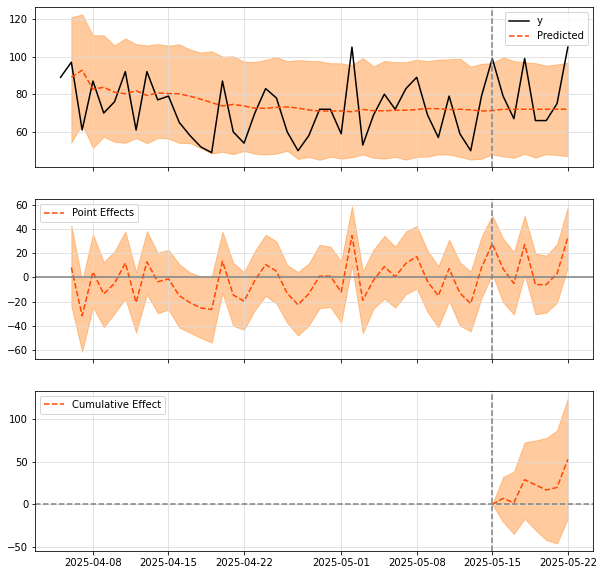

In [29]:
impact_new_posts.plot(figsize=(10,10))

## Результаты A/B-теста

### DAU
- **Изменение:** значимо не изменилось  
- **Средний абсолютный эффект:** ~850 пользователей

### CTR
- **Изменение:** значимо, но незначительно вырос  
- **Средний абсолютный эффект:** ~0.01

### Число просмотров
- **Изменение:** значимо выросло  
- **Средний абсолютный эффект:** ~659 855 просмотров

### Число новых постов
- **Изменение:** значимо не изменилось  
- **Средний абсолютный эффект:** ~8 постов

### Число уникальных просматриваемых постов
- **Изменение:** значимо выросло  
- **Средний абсолютный эффект:** ~76 постов